Train on 2944 samples, validate on 736 samples
Epoch 1/24
2944/2944 [==============================] - 0s 148us/step - loss: 0.4181 - accuracy: 0.8329 - val_loss: 0.2891 - val_accuracy: 0.9049
Epoch 2/24
2944/2944 [==============================] - 0s 52us/step - loss: 0.2581 - accuracy: 0.9127 - val_loss: 0.2340 - val_accuracy: 0.9307
Epoch 3/24
2944/2944 [==============================] - 0s 55us/step - loss: 0.2191 - accuracy: 0.9270 - val_loss: 0.2169 - val_accuracy: 0.9334
Epoch 4/24
2944/2944 [==============================] - 0s 46us/step - loss: 0.2000 - accuracy: 0.9321 - val_loss: 0.2070 - val_accuracy: 0.9321
Epoch 5/24
2944/2944 [==============================] - 0s 57us/step - loss: 0.1900 - accuracy: 0.9355 - val_loss: 0.2036 - val_accuracy: 0.9334
Epoch 6/24
2944/2944 [==============================] - 0s 52us/step - loss: 0.1812 - accuracy: 0.9351 - val_loss: 0.1992 - val_accuracy: 0.9348
Epoch 7/24
2944/2944 [==============================] - 0s 57us/step - loss: 0.174

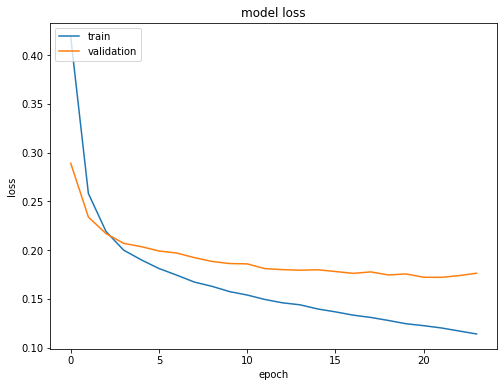

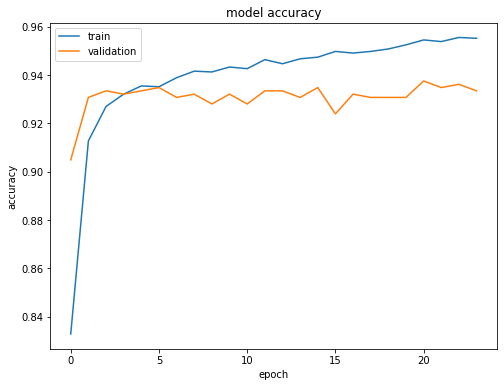

Train on 2944 samples, validate on 736 samples
Epoch 1/12
2944/2944 [==============================] - 0s 154us/step - loss: 0.4666 - accuracy: 0.8010 - val_loss: 0.2963 - val_accuracy: 0.8995
Epoch 2/12
2944/2944 [==============================] - 0s 49us/step - loss: 0.2631 - accuracy: 0.9062 - val_loss: 0.2294 - val_accuracy: 0.9253
Epoch 3/12
2944/2944 [==============================] - 0s 48us/step - loss: 0.2154 - accuracy: 0.9246 - val_loss: 0.2115 - val_accuracy: 0.9361
Epoch 4/12
2944/2944 [==============================] - 0s 60us/step - loss: 0.1947 - accuracy: 0.9324 - val_loss: 0.2017 - val_accuracy: 0.9361
Epoch 5/12
2944/2944 [==============================] - 0s 52us/step - loss: 0.1812 - accuracy: 0.9365 - val_loss: 0.1944 - val_accuracy: 0.9307
Epoch 6/12
2944/2944 [==============================] - 0s 60us/step - loss: 0.1712 - accuracy: 0.9389 - val_loss: 0.1911 - val_accuracy: 0.9375
Epoch 7/12
2944/2944 [==============================] - 0s 54us/step - loss: 0.163

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 17 17:47:37 2020

@author: vatsal
"""

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model

def load_spam_data():
    
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
    x = df.iloc[:, :57].values
    y = df.iloc[:, 57].values 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train,x_val, y_train,y_val = train_test_split(x_train,y_train , test_size = 0.2, random_state = 42)
    sc_x = StandardScaler()
    x_train = sc_x.fit_transform(x_train)
    x_test = sc_x.transform(x_test)
    x_val =sc_x.transform(x_val)
    return x_train,x_test,x_val,y_train,y_test,y_val

x_train,x_test,x_val,y_train,y_test,y_val = load_spam_data()

#Builiding a sequential model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(57,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=24, validation_data=(x_val,y_val))
model.summary()

#Plot the training and validation loss as a function of no. of epochs
def plotloss(history):  
    plt.figure(figsize=(8,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotloss(history)

#Plot the training and validation accuracy as a function of no. of epochs
def plotaccuracy(history):  
    plt.figure(figsize=(8,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
plotaccuracy(history)    

#Saving the model with paramteres
model.save('task_2.h5')
model = load_model('task_2.h5')

#Retraining the final model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(57,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=12, validation_data=(x_val,y_val))

#Evaluating the model with the test set
result = model.evaluate(x= x_test,y= y_test)
print("Accuracy: {}".format(result[1]*100),2)













    
